<a href="https://colab.research.google.com/github/dhanushkumar-amk/MENTAL-STRESS-PREDICTION-USING-DECISION-TREE-WITH-VISUAL/blob/main/simple_model_mental_stress_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

🔹 Generated Dataset with 50 Records:
    social_media_use  sleep  exercise  workload stress_level
0                  3      9         4         5          Low
1                  4      5         0         7       Medium
2                  2      5         0         7       Medium
3                  4      4         0         4       Medium
4                  4      5         0         7       Medium
5                  1      8         3         3          Low
6                  2      5         2         6       Medium
7                  2      7         2         2       Medium
8                  2      7         0        10       Medium
9                  4      7         2         9       Medium
10                 3      7         2         5       Medium
11                 2      8         0         6       Medium
12                 5      6         2         4       Medium
13                 4      9         4        10          Low
14                 1      4         1         7 

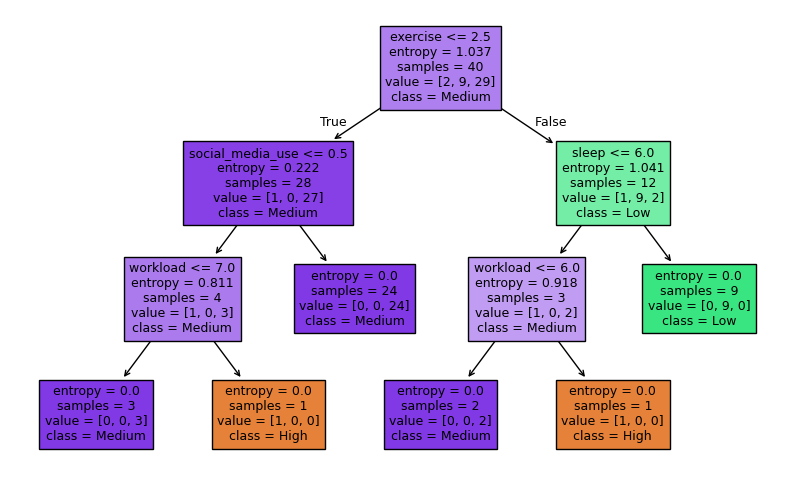

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt

# Step 1: Generate synthetic dataset (50 samples)
np.random.seed(42)

data = {
    "social_media_use": np.random.randint(0, 6, 50),   # 0–5 hours/day
    "sleep": np.random.randint(4, 10, 50),             # 4–9 hours/day
    "exercise": np.random.randint(0, 6, 50),           # 0–5 hours/day
    "workload": np.random.randint(1, 11, 50)           # 1–10 scale
}

df = pd.DataFrame(data)

# Step 2: Define stress level (target)
# Simple rules for generating labels:
# - High workload + low sleep = High stress
# - Good sleep + regular exercise = Low stress
# - Otherwise = Medium stress

stress = []
for i in range(len(df)):
    if df.loc[i, "workload"] > 7 and df.loc[i, "sleep"] < 6:
        stress.append("High")
    elif df.loc[i, "exercise"] >= 3 and df.loc[i, "sleep"] >= 7:
        stress.append("Low")
    else:
        stress.append("Medium")

df["stress_level"] = stress

print("🔹 Generated Dataset with 50 Records:")
print(df)

# Step 3: Split data
X = df[["social_media_use", "sleep", "exercise", "workload"]]
y = df["stress_level"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Train Decision Tree
model = DecisionTreeClassifier(criterion="entropy", max_depth=3, random_state=42)
model.fit(X_train, y_train)

# Step 5: Evaluate
y_pred = model.predict(X_test)
print("\n🔹 Accuracy:", accuracy_score(y_test, y_pred))
print("\n🔹 Classification Report:\n", classification_report(y_test, y_pred))

# Step 6: Visualize Decision Tree
plt.figure(figsize=(10, 6))
plot_tree(model, feature_names=X.columns, class_names=model.classes_, filled=True, fontsize=9)
plt.show()
